In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
path= r"C:\Users\Holly\OneDrive\David's work\Instacart Basket Analysis"

In [20]:
# 1) Import the data set you exported in Exercise 4.9 into a new Jupyter notebook

In [5]:
final_df= pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','full_merged_cleaned.pkl'))

In [7]:
# Creating a frequency table for the most ordered products
top_products = final_df['product_name'].value_counts().head(20)

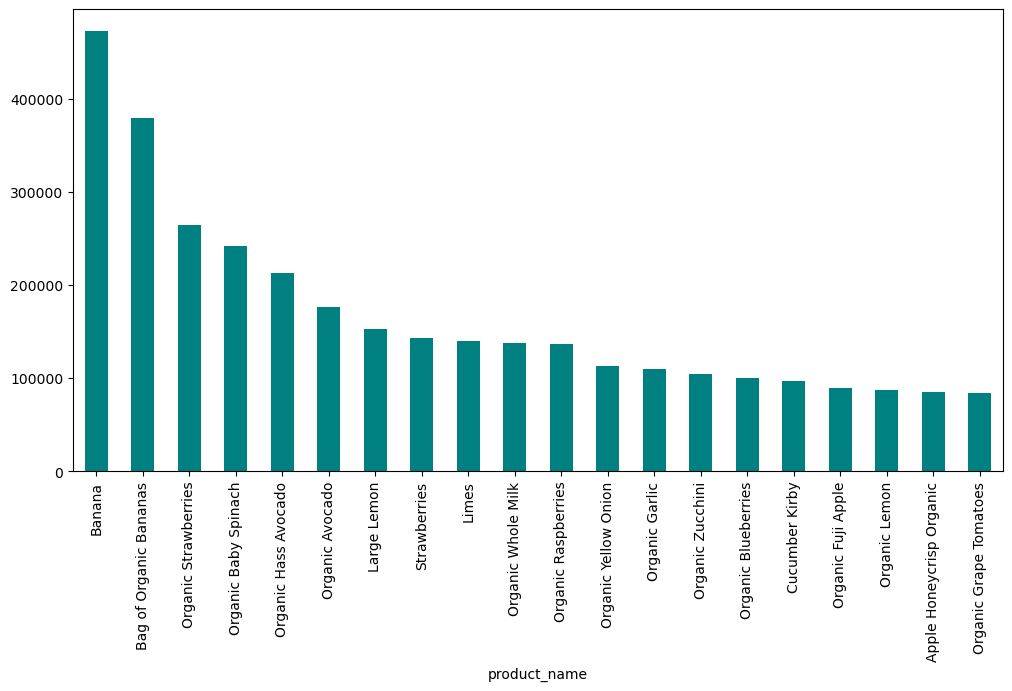

In [9]:
# Creating a bar chart
bar_popular = top_products.plot.bar(color='teal', figsize=(12,6))

In [11]:
# Exporting the chart
bar_popular.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_most_popular_products.png'))

In [9]:
# Creating a frequency table for product orders by department
department_orders = final_df['department_id'].value_counts().sort_values(ascending=False)

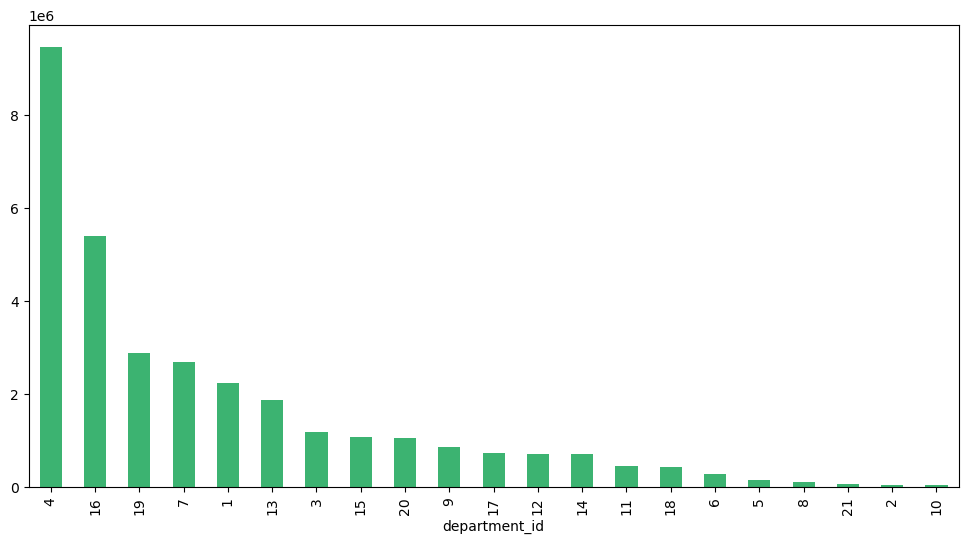

In [15]:
# Creating a bar chart
bar_dept_orders = department_orders.plot.bar(color='mediumseagreen', figsize=(12,6))

In [23]:
# Exporting the chart
bar_dept_orders.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_department_orders.png'))

In [27]:
# 1. Creating the department mapping manually
dept_labels = {
    1: 'frozen', 2: 'other', 3: 'bakery', 4: 'produce', 5: 'alcohol',
    6: 'international', 7: 'beverages', 8: 'pets', 9: 'dry goods pasta',
    10: 'bulk', 11: 'personal care', 12: 'meat seafood', 13: 'pantry',
    14: 'breakfast', 15: 'canned goods', 16: 'dairy eggs', 17: 'household',
    18: 'babies', 19: 'snacks', 20: 'deli', 21: 'missing'
}


In [29]:
# 2. Grouping and counting orders per department
department_orders = final_df['department_id'].value_counts().reset_index()
department_orders.columns = ['department_id', 'order_count']



In [31]:
# 3. Mapping department_id to department name
department_orders['department'] = department_orders['department_id'].map(dept_labels)


In [33]:
# 4. Sorting and setting index for plotting
department_orders = department_orders.sort_values('order_count', ascending=False)
department_orders.set_index('department', inplace=True)

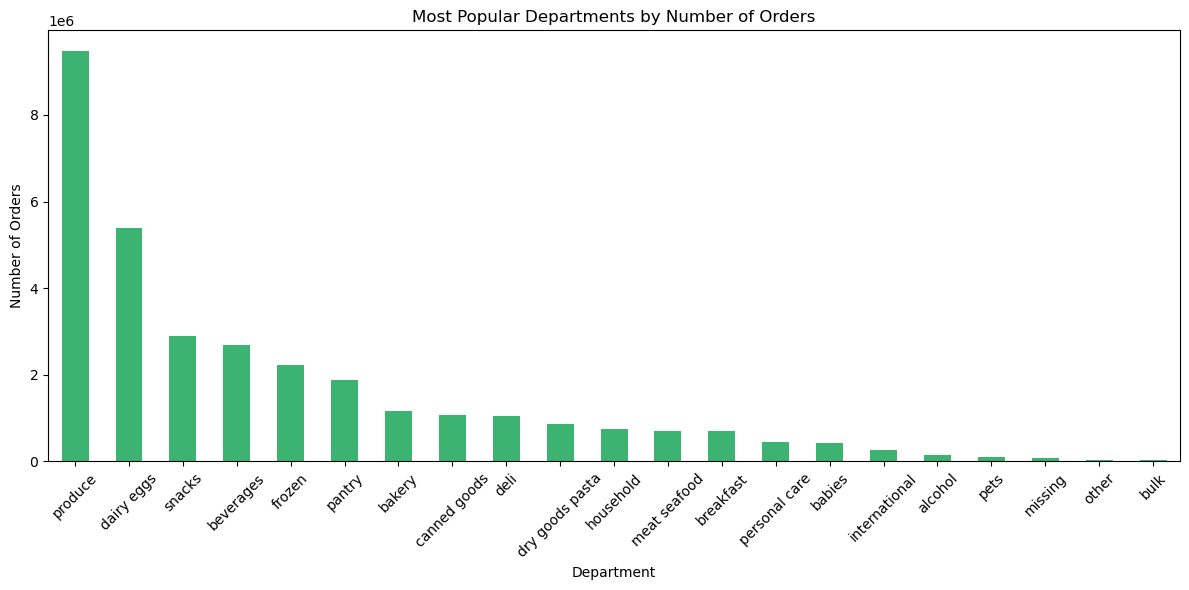

In [35]:
# 5. Plotting
bar_dept_orders = department_orders['order_count'].plot.bar(
    figsize=(12, 6),
    color='mediumseagreen'
)
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.title('Most Popular Departments by Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
# Creating income group categories
final_df['income_group'] = pd.cut(final_df['income'], 
                                  bins=[0, 40000, 100000, float('inf')], 
                                  labels=['LOW', 'MIDDLE', 'HIGH'])

In [27]:
# Cross-tab loyalty and income group
loyalty_income = pd.crosstab(final_df['loyalty_flag'], final_df['income_group'])

In [29]:
# Cross-tab loyalty and family status
loyalty_family = pd.crosstab(final_df['loyalty_flag'], final_df['fam_status'])

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

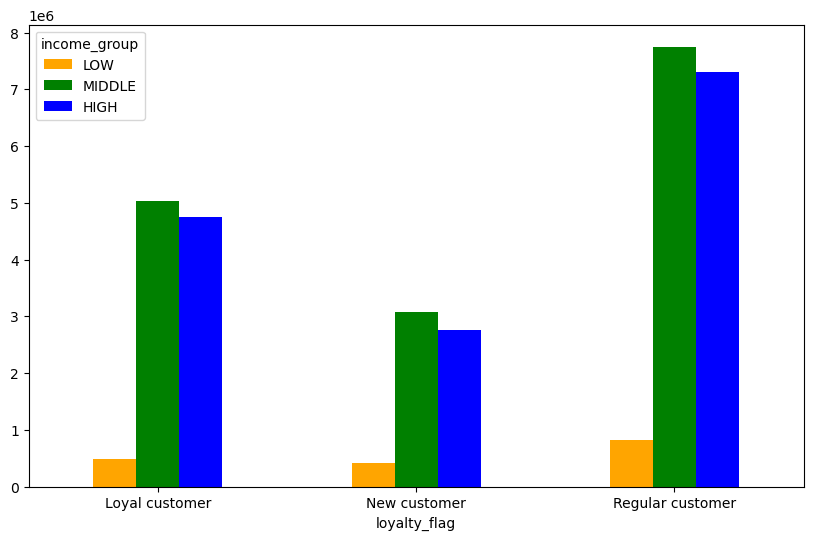

In [41]:
# Plot the chart
bar_loyalty_income = loyalty_income.plot(kind='bar', color=['orange', 'green', 'blue'], figsize=(10,6))
plt.xticks(rotation=0)

In [43]:
# Exporting the chart
bar_loyalty_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_by_income2.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

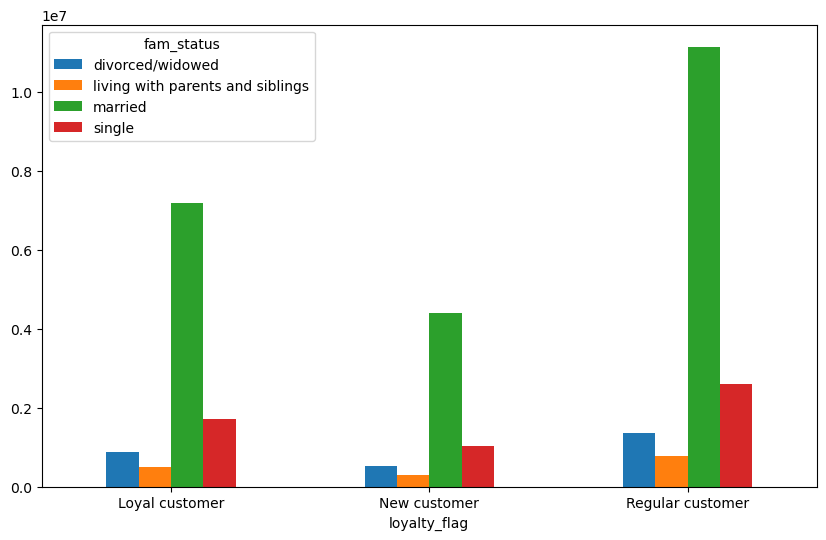

In [39]:
# Plot the chart
bar_loyalty_family = loyalty_family.plot(kind='bar', figsize=(10,6))
plt.xticks(rotation=0)

In [45]:
# Export the chart
bar_loyalty_family.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_by_family2.png'))

In [47]:
# Creating a cross-tab for loyalty vs spending
loyalty_spending = pd.crosstab(final_df['loyalty_flag'], final_df['spending_flag'])

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

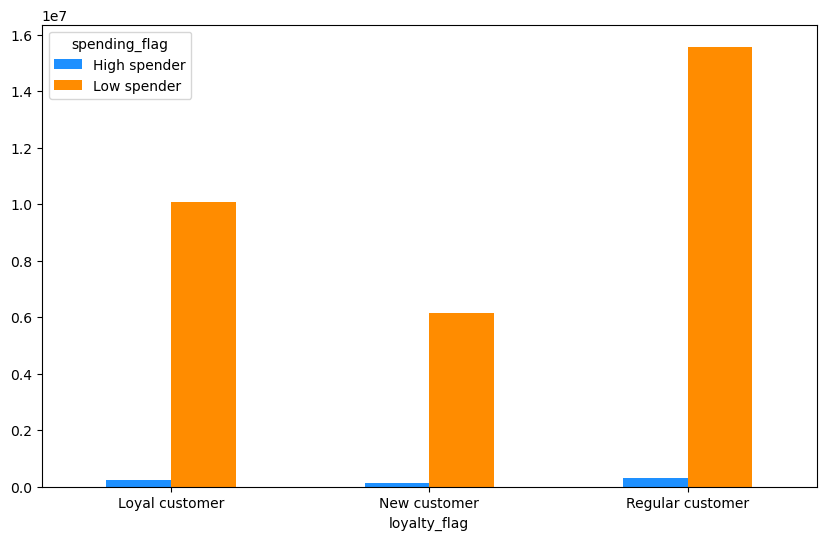

In [49]:
# Plotting the grouped bar chart
bar_loyalty_spending = loyalty_spending.plot(kind='bar', 
                                              color=['dodgerblue', 'darkorange'], 
                                              figsize=(10,6))
plt.xticks(rotation=0)

In [51]:
# Exporting the chart
bar_loyalty_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_by_spending.png'))

In [7]:
pd.set_option('display.max_columns', None)

In [30]:
final_df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,merge_status,price_range_loc,busiest day,busiest days,busiest hours,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_per_user,order_regularity,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
1,0,2539329,1,prior,1,2,8,NaN,14084,2,0,both,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
2,0,2539329,1,prior,1,2,8,NaN,12427,3,0,both,12427,Original Beef Jerky,23,19,4.4,both,Low-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
3,0,2539329,1,prior,1,2,8,NaN,26088,4,0,both,26089,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423
4,0,2539329,1,prior,1,2,8,NaN,26405,5,0,both,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423


#

In [22]:
# 2) Consider any security implications that might exist for this new data

### The security implications that existed in this data have been partially addressed by deleting the names of the clients. However, other quasi-identifiers such as age, gender, location, and income remain and could potentially be used for re-identification. Further anonymization may be required depending on the use case

In [48]:
# 3) create a “Region” column based on the “State” column from your customers data set and 
# Determine whether there’s a difference in spending habits between the different U.S. region

In [55]:
## Defining the mapping of states to regions
state_to_region = {
    # Region 1 - Northeast
    'Maine': 'Northeast', 'New Hampshire': 'Northeast', 'Vermont': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New York': 'Northeast', 'Pennsylvania': 'Northeast', 'New Jersey': 'Northeast',
    
    # Region 2 - Midwest
    'Wisconsin': 'Midwest', 'Michigan': 'Midwest', 'Illinois': 'Midwest',
    'Indiana': 'Midwest', 'Ohio': 'Midwest', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest',
    
    # Region 3 - South
    'Delaware': 'South', 'Maryland': 'South', 'District of Columbia': 'South',
    'Virginia': 'South', 'West Virginia': 'South', 'North Carolina': 'South',
    'South Carolina': 'South', 'Georgia': 'South', 'Florida': 'South',
    'Kentucky': 'South', 'Tennessee': 'South', 'Mississippi': 'South',
    'Alabama': 'South', 'Oklahoma': 'South', 'Texas': 'South',
    'Arkansas': 'South', 'Louisiana': 'South',
    
    # Region 4 - West
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Nevada': 'West',
    'Utah': 'West', 'Colorado': 'West', 'Arizona': 'West', 'New Mexico': 'West',
    'Alaska': 'West', 'Washington': 'West', 'Oregon': 'West',
    'California': 'West', 'Hawaii': 'West'
}

In [57]:
## Mapping the 'STATE' column to a new 'Region' column
final_df['Region'] = final_df['STATE'].map(state_to_region)

In [59]:
# Crosstab for region vs spending category
region_spending = pd.crosstab(final_df['Region'], final_df['spending_flag'])

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

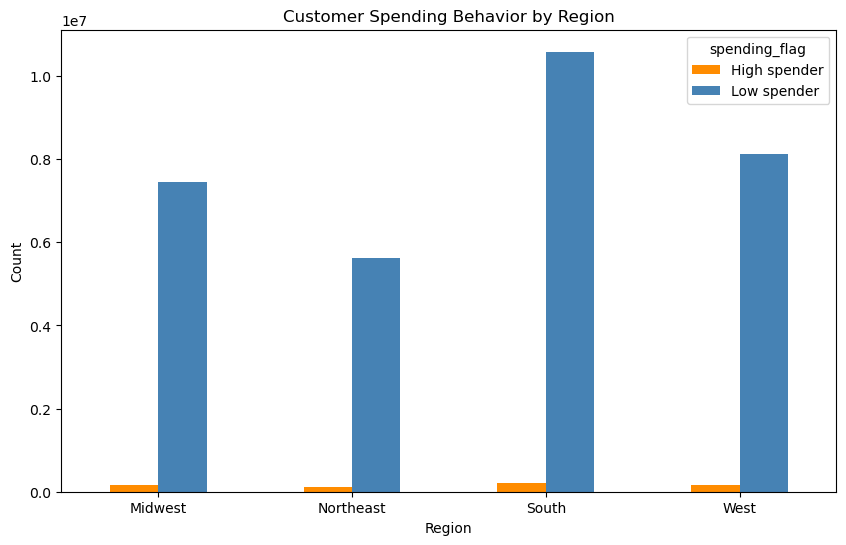

In [61]:

# Bar chart
bar_region_spending = region_spending.plot(kind='bar', 
                                            figsize=(10,6), 
                                            color=['darkorange', 'steelblue'])

# Labels
plt.title('Customer Spending Behavior by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [ ]:
# Export the chart
bar_region_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_spending.png'))

In [65]:
region_product = pd.crosstab(final_df['Region'], final_df['product_name'])

In [69]:
top_products = final_df['product_name'].value_counts().head(10).index
region_product_top = region_product[top_products]

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Midwest'),
  Text(1, 0, 'Northeast'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West')])

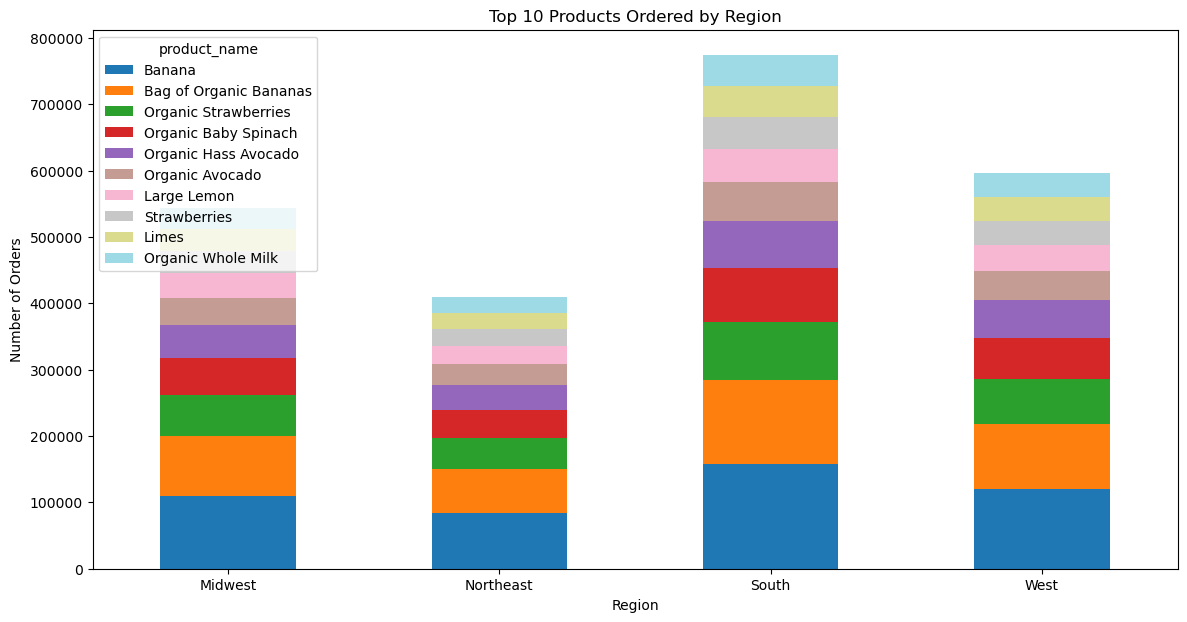

In [71]:
# Plotting
bar_region_product = region_product_top.plot(kind='bar', 
                                              stacked=True, 
                                              figsize=(14,7), 
                                              colormap='tab20')

# Chart labels
plt.title('Top 10 Products Ordered by Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)

In [73]:
# Export to project folder
bar_region_product.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_region_by_product.png'))

In [101]:
# Creating an age group variable
# Age groups
final_df['age_group'] = pd.cut(final_df['Age'],
                               bins=[0, 25, 65, float('inf')],
                               labels=['Youth: <=29 years', 'Adult: 30–64 years', 'Senior: 65+ years'])

In [93]:
# Creating a cross-tab of loyalty_flag by age group
age_loyalty = pd.crosstab(final_df['loyalty_flag'], final_df['age_group'])

In [79]:
# Creating a cross-tab of loyalty_flag by family status
fam_loyalty = pd.crosstab(final_df['loyalty_flag'], final_df['fam_status'])


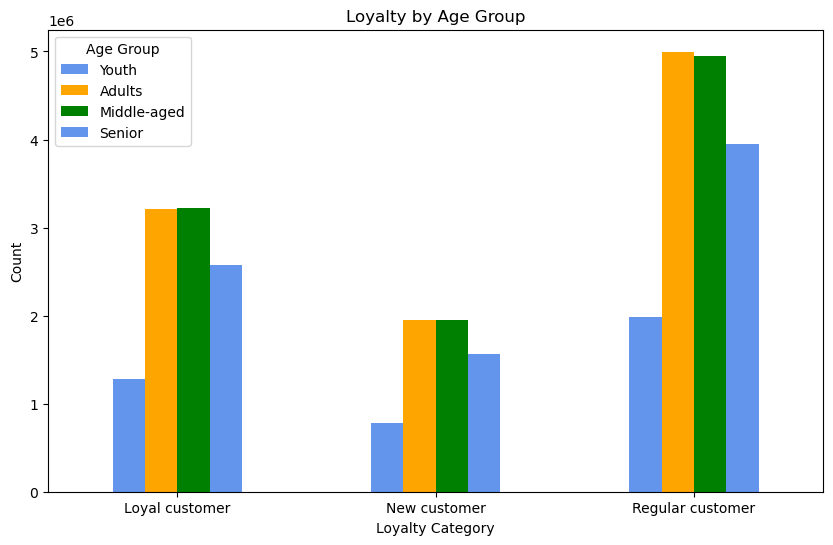

In [81]:
# Plotting loyalty by age group
bar_age = age_loyalty.plot(kind='bar', color=['cornflowerblue', 'orange', 'green'], figsize=(10,6))
plt.title('Loyalty by Age Group')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
bar_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_age.png'))

In [83]:
bar_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_age.png'))

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

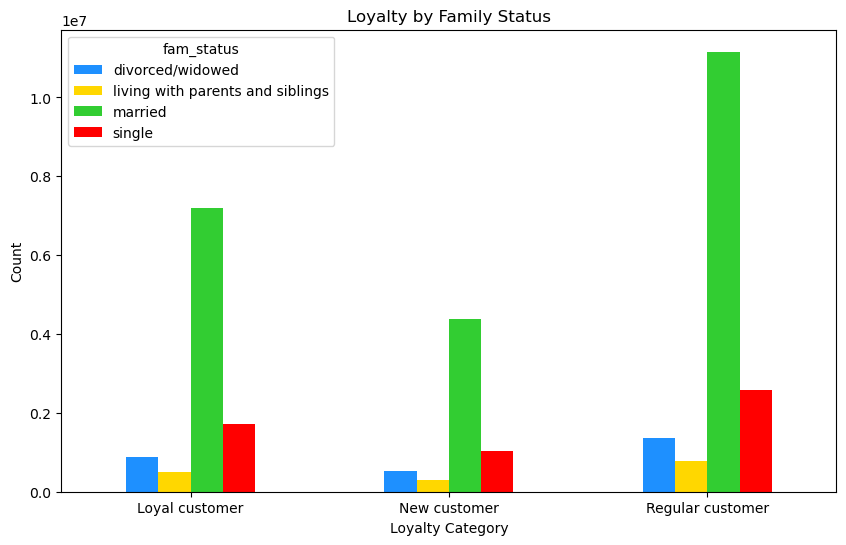

In [85]:
# Plotting loyalty by family status
bar_fam = fam_loyalty.plot(kind='bar', 
                           color=['dodgerblue', 'gold', 'limegreen', 'red'], 
                           figsize=(10,6))
plt.title('Loyalty by Family Status')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.xticks(rotation=0)

In [87]:
bar_fam.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_family.png'))

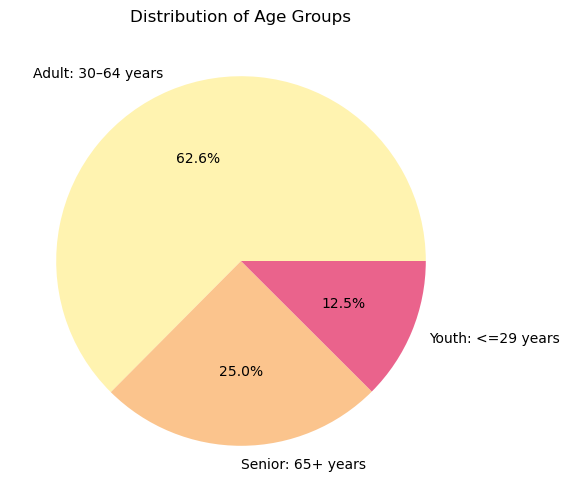

In [103]:
age_pie = final_df['age_group'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%',
    colors=['#FFF3B0', '#FBC48D', '#EA638C'],
    title='Distribution of Age Groups',
    ylabel='', figsize=(6, 6)
)

In [105]:
age_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_pie.png'))

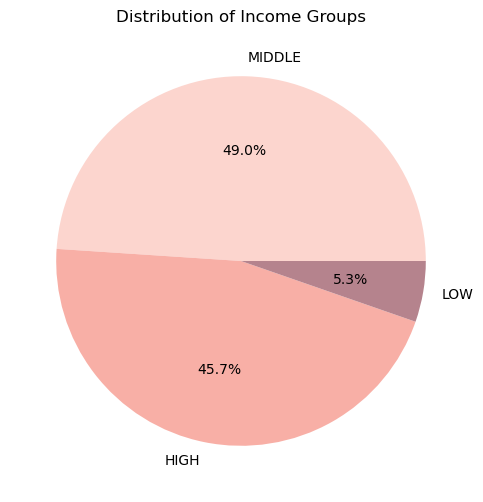

In [107]:
income_pie = final_df['income_group'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%',
    colors=['#FCD5CE', '#F8AFA6', '#B5838D'],
    title='Distribution of Income Groups',
    ylabel='', figsize=(6, 6)
)

In [109]:
income_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_pie.png'))

In [42]:
final_df.head()

,Unnamed: 0_x,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,_merge,Unnamed: 0_y,product_name,aisle_id,department_id,prices,merge_status,price_range_loc,busiest day,busiest days,busiest hours,busiest_period_of_day,max_order,loyalty_flag,spending_flag,avg_price_per_user,order_regularity,order_frequency_flag,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,Region
0,0,2539329,1,prior,1,2,8,NaN,196,1,0,both,195,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
1,0,2539329,1,prior,1,2,8,NaN,14084,2,0,both,14084,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,Mid-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
2,0,2539329,1,prior,1,2,8,NaN,12427,3,0,both,12427,Original Beef Jerky,23,19,4.4,both,Low-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
3,0,2539329,1,prior,1,2,8,NaN,26088,4,0,both,26089,Aged White Cheddar Popcorn,23,19,4.7,both,Low-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South
4,0,2539329,1,prior,1,2,8,NaN,26405,5,0,both,26406,XL Pick-A-Size Paper Towel Rolls,54,17,1.0,both,Low-range product,Regularly busy,Regularly busy,Average orders,Average orders,10,New customer,Low spender,6.367797,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South


In [44]:
##  Creating a cross-tab of spending flag by region (percentage of each spending type by region)
region_spending = pd.crosstab(final_df['Region'], final_df['spending_flag'], normalize='index') * 100

In [46]:
region_spending

spending_flag,High spender,Low spender
Region,,
Midwest,2.053025,97.946975
Northeast,1.891141,98.108859
South,1.943043,98.056957
West,1.933627,98.066373


In [50]:
# 4)  Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. 
# Make sure you export this sample

In [13]:
## Creating exclusion flag
final_df['exclusion_flag'] = final_df['max_order'] < 5

In [16]:
final_df_active=final_df[final_df['exclusion_flag'] == False]

In [18]:
final_df_active.shape

(30964564, 38)

In [20]:
## Exporting filtered dataset
final_df_active.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_df_active.pkl'))

In [58]:
# 5) Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

In [73]:
## Seeing which types of goods are in each department
roducts_by_department = final_df.groupby('department_id')['product_name'].unique()

In [67]:
roducts_by_department

department_id
1     [Pad Thai, Chicken Tikka Masala with Cumin Inf...
2     [Zero Calorie Tonic Water, Crushed Chili, 93/7...
3     [Organic White English Muffins, Gluten Free 7 ...
4     [Bag of Organic Bananas, Organic Fuji Apples, ...
5     [Private Selection Pinot Noir, Extra-Dry Cava,...
6     [Garlic Pepper Ramen, Organic Lemongrass Ginge...
7     [Soda, Zero Calorie Cola, Organic Just Concord...
8     [Ear Candy (Cow Ears) Dog Chews, Grain Free Tu...
9     [Garlic Couscous, Organic Spinach & Cheese Tor...
10    [Dried Mango, Organic Rolled Oats, Apricots, V...
11    [Sugarfree Peppermint Chewing Gum, Moisturizin...
12    [Organic Turkey Burgers, Ground Turkey Breast,...
13    [Creamy Almond Butter, Baked Organic Sea Salt ...
14    [Cinnamon Toast Crunch, Whole Wheat Blueberry ...
15    [Wild Albacore Tuna No Salt Added, Vegetable C...
16    [Organic Unsweetened Vanilla Almond Milk, Orga...
17    [XL Pick-A-Size Paper Towel Rolls, 100% Recycl...
18    [Organic Stage 3 Pumpkin Cra

In [79]:
# Creating an empty profile column 
final_df['profile'] = 'Other'

In [93]:
##  Assigning a customer profile based on demographic and behavioral data
# Young parent: Younger age, has dependents, modest income
final_df.loc[
    (final_df['Age'] < 40) &
    (final_df['n_dependants'] >= 1) &
    (final_df['income'] < 80000),
    'profile'
] = 'Young parent'

# Affluent family: Mid age, has dependents, high income
final_df.loc[
    (final_df['Age'].between(35, 55)) &
    (final_df['income'] > 90000) &
    (final_df['n_dependants'] >= 2),
    'profile'
] = 'Affluent family'

# Retired adult: Older age, shops early on weekdays
final_df.loc[
    (final_df['Age'] > 60) &
    (final_df['order_hour_of_day'] < 11) &
    (final_df['orders_day_of_week'] < 5),
    'profile'
] = 'Retired adult'

# Single adult: Middle age, no dependents, middle income
final_df.loc[
    (final_df['Age'].between(30, 50)) &
    (final_df['n_dependants'] == 0) &
    (final_df['income'].between(40000, 90000)),
    'profile'
] = 'Single adult'

# Young adult: Under 30, no dependents, shops late
final_df.loc[
    (final_df['Age'] < 30) &
    (final_df['n_dependants'] == 0) &
    (final_df['order_hour_of_day'] >= 20),
    'profile'
] = 'Young adult'

In [85]:
# 6) Create an appropriate visualization to show the distribution of profiles

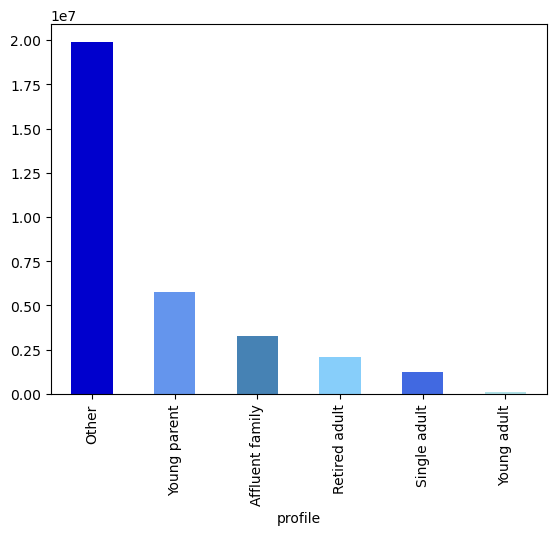

In [97]:
## Creating a frequency bar chart
bar = final_df['profile'].value_counts().plot.bar(
    color = ['mediumblue', 'cornflowerblue', 'steelblue', 'lightskyblue', 'royalblue', 'powderblue']
)

In [99]:
# 7) Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [101]:
## Aggregating order_regularity and avg_price_per_user by profile
profile_agg = final_df.groupby('profile').agg({
    'order_regularity': ['max', 'mean', 'min'],
    'avg_price_per_user': ['max', 'mean', 'min']
})

In [103]:
profile_agg

order_regularity                 avg_price_per_user  \
                             max       mean  min                max   
profile                                                               
Affluent family             30.0  10.318016  0.0       11772.100000   
Other                       30.0  10.480030  0.0       25005.425000   
Retired adult               30.0   9.763263  0.0        7414.485185   
Single adult                30.0  10.284417  0.0        3453.431034   
Young adult                 30.0  10.501195  0.0        8794.882427   
Young parent                30.0  10.411694  0.0          22.256974   

                                    
                      mean     min  
profile                             
Affluent family  14.764907  7.0000  
Other            13.074148  1.0000  
Retired adult    11.482155  1.2625  
Single adult      7.872912  1.1000  
Young adult       9.518620  1.1000  
Young parent      7.727208  1.0000

In [105]:
# 8) Compare your customer profiles with regions and departments. Can you identify a link between them?

In [109]:
# Profile vs Region: percentage distribution
profile_region = pd.crosstab(final_df['profile'], final_df['Region'], normalize='columns') * 100
profile_region

Region,Midwest,Northeast,South,West
profile,,,,
Affluent family,10.160721,10.377956,10.000774,10.184527
Other,61.490275,61.548899,61.194444,61.516249
Retired adult,6.399937,6.596652,6.504183,6.317201
Single adult,3.791953,3.792329,3.969659,3.911617
Young adult,0.399535,0.462139,0.411040,0.369098
Young parent,17.757579,17.222025,17.919900,17.701307


In [113]:
## Profile vs Department: count of purchases
profile_dept = pd.crosstab(final_df['profile'], final_df['department_id'])
profile_dept

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
profile,,,,,,,,,,,,,,,,,,,,,
Affluent family,230860,3631,121624,978508,15205,28109,257474,10131,92667,3164,46481,78113,194799,69472,113908,554718,75206,47891,253452,107374,6925
Other,1388264,22592,720063,5800431,98641,166598,1657732,61743,535204,21227,276278,437434,1159378,427645,656780,3300774,456525,252963,1770106,646586,42456
Retired adult,127661,2233,75924,618866,7179,16048,181405,5281,51942,2284,27910,43261,114564,48774,64730,360200,48036,30796,193097,65089,4257
Single adult,85687,1449,46472,372957,5660,10345,103327,3602,32700,1306,17647,26548,71047,26363,41673,209842,27901,17140,111794,41682,2758
Young adult,9201,144,4476,40700,340,1197,9786,412,3551,136,1786,2880,7555,2716,4480,21991,2882,2239,10876,4111,310
Young parent,393070,6242,203869,1667829,26671,46956,478399,16547,150563,6456,77470,120691,328026,128063,186487,951222,128116,72773,548225,186407,12439


In [115]:
# 9) Produce suitable charts to illustrate your results and export them in your project folder

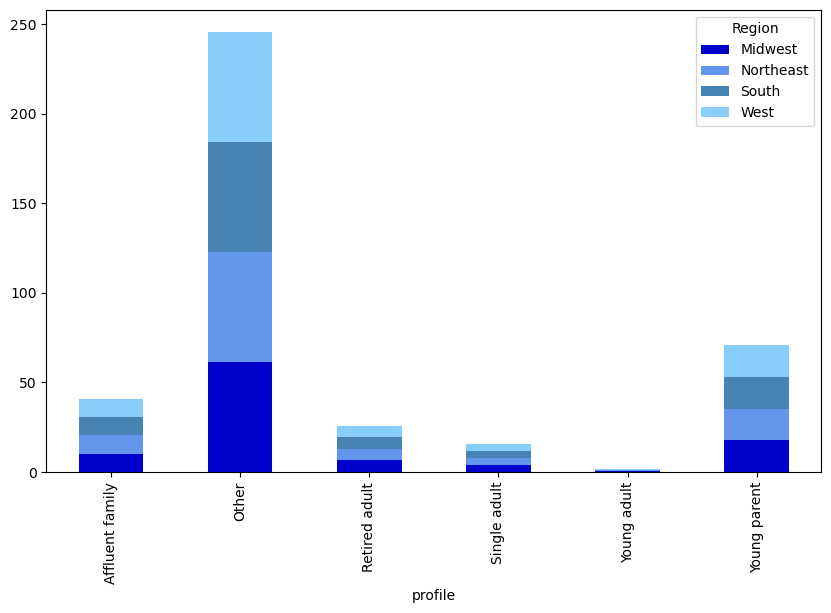

In [117]:
## Create the bar chart for profiles by region and saving it as an object
bar_region = profile_region.plot(kind='bar', stacked=True, color = ['mediumblue', 'cornflowerblue', 'steelblue', 'lightskyblue', 'royalblue', 'powderblue'], figsize=(10,6))

In [127]:
# Exporting the chart to my project folder
bar_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profiles_by_region.png'))

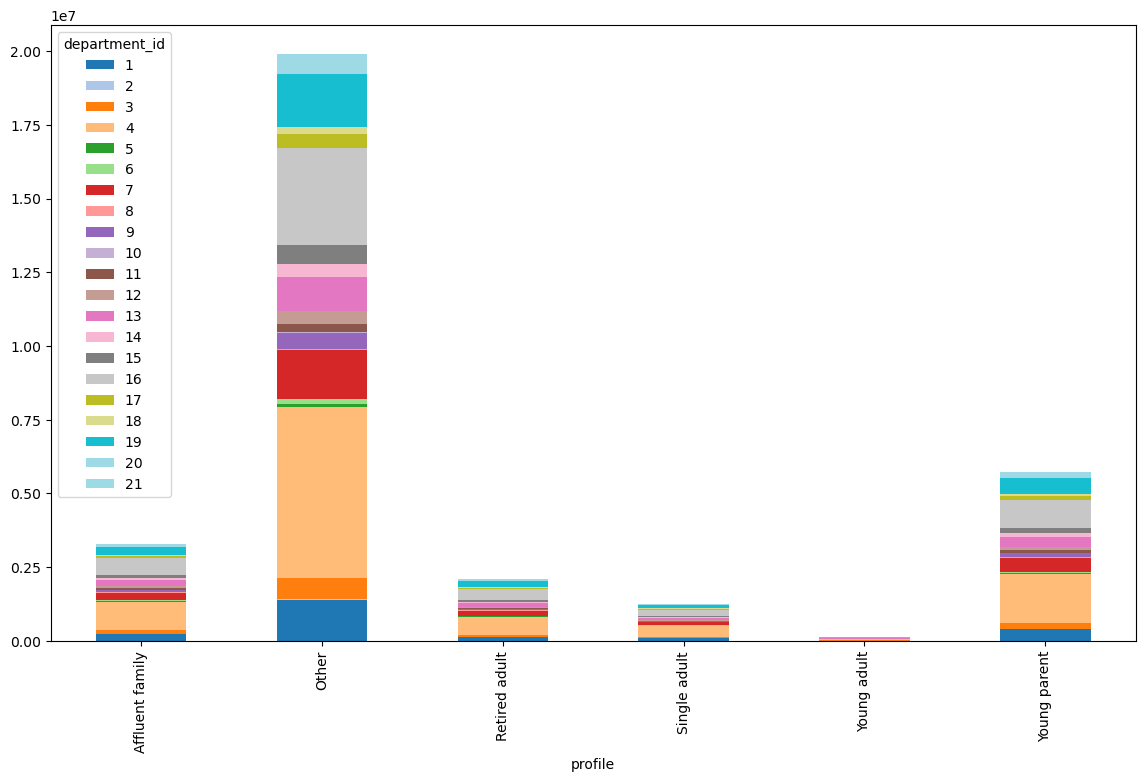

In [125]:
## Creating the bar chart for profiles by department and saving it as an object
bar_dept = profile_dept.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',  # Better color variety
    figsize=(14, 8)
)

In [129]:
# Exporting the chart to my project folder
bar_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profiles_by_department.png'))

In [131]:
# 10) Export your final data set, and save your notebook
final_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_df_with_profiles.pkl'))